<a href="https://colab.research.google.com/github/faridrizqi46/Time-Series/blob/main/Latihan_LSTM_TimeSeries_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Youtube Channel sebagai contoh
[Klik aku dong](https://www.youtube.com/watch?v=UbvkhuqVqUI)



In [ ]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [ ]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y,s =[],[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [ ]:
#Ini sama kayak diatas cuma nambah print i aja
def prepare_data(timeseries_data, n_features):
  X, y=[],[]
  for i in range(len(timeseries_data)):
    print(i)
    end_ix = i + n_features
    if end_ix > len(timeseries_data)-1:
      break
    seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

In [ ]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

0
1
2
3
4
5
6


In [ ]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [ ]:
X.shape

(6, 3)

In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [ ]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 32502.9316
Epoch 2/300
1/1 [==============================] - 0s 5ms/step - loss: 32105.7891
Epoch 3/300
1/1 [==============================] - 0s 10ms/step - loss: 31697.7441
Epoch 4/300
1/1 [==============================] - 0s 11ms/step - loss: 31283.7441
Epoch 5/300
1/1 [==============================] - 0s 10ms/step - loss: 30870.2715
Epoch 6/300
1/1 [==============================] - 0s 11ms/step - loss: 30469.9395
Epoch 7/300
1/1 [==============================] - 0s 11ms/step - loss: 30101.0000
Epoch 8/300
1/1 [==============================] - 0s 11ms/step - loss: 29775.6484
Epoch 9/300
1/1 [==============================] - 0s 11ms/step - loss: 29488.2715
Epoch 10/300
1/1 [==============================] - 0s 11ms/step - loss: 29223.4746
Epoch 11/300
1/1 [==============================] - 0s 10ms/step - loss: 28965.9082
Epoch 12/300
1/1 [==============================] - 0s 11ms/step - loss: 28710.9844
Epoc

In [ ]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[223.30302]
1 day input [196.         210.         223.30302429]
1 day output [[235.21507]]
2 day input [210.         223.30302429 235.21507263]
2 day output [[250.42128]]
3 day input [223.30302 235.21507 250.42128]
3 day output [[265.00882]]
4 day input [235.21507 250.42128 265.00882]
4 day output [[279.9169]]
5 day input [250.42128 265.00882 279.9169 ]
5 day output [[296.95914]]
6 day input [265.00882 279.9169  296.95914]
6 day output [[313.9726]]
7 day input [279.9169  296.95914 313.9726 ]
7 day output [[332.03668]]
8 day input [296.95914 313.9726  332.03668]
8 day output [[351.7182]]
9 day input [313.9726  332.03668 351.7182 ]
9 day output [[371.99484]]
[223.30302, 235.21507, 250.42128, 265.00882, 279.9169, 296.95914, 313.9726, 332.03668, 351.7182, 371.99484]


In [ ]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [ ]:
lst_output

[223.30302,
 235.21507,
 250.42128,
 265.00882,
 279.9169,
 296.95914,
 313.9726,
 332.03668,
 351.7182,
 371.99484]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

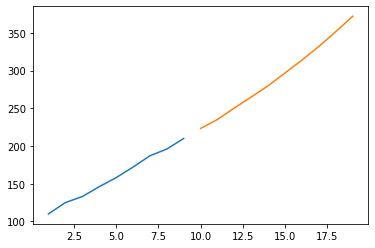

In [ ]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)